In [214]:
from math import sqrt
import numpy as np
import warnings
import pandas as pd
import random

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

from collections import Counter

In [215]:
point_1 = [1,3]
point_2 = [2,5]

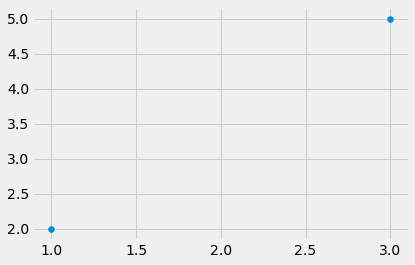

In [216]:
plt.scatter(point_1, point_2)
plt.show()

In [239]:
#sqrt( sum(Pi**2 - Qi**2) )
# numpy uses this way to claclulate ED np.linalg.norm(a-b)
Euclidean_distance = sqrt( ((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2 ) )
Euclidean_distance

2.23606797749979

In [102]:
############################################################

In [231]:
# let's create a small dataset
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}

# new data point
new_features = [3.5,3.5]

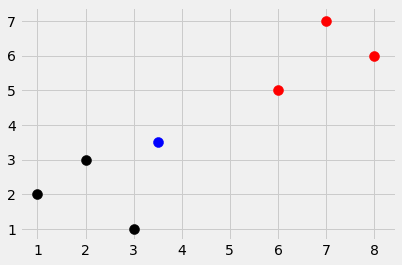

In [232]:
# for i in dataset:
#    for ii in dataset[i]:
#        plt.scatter(ii[0],ii[1], s=100, color=i)

# this is exactly the same as the previous nested loop
[[ plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]


# plot the new data point
plt.scatter(new_features[0], new_features[1], s=100, c='b')

plt.show()

In [240]:
def k_nearest_neigbours(data, predict, k=5):
    if len(data) >= k:
        warnings.warn('k is set to a value which is less than the voting groups.')
    
    distances = []
    for group in data:
        for features in data[group]:
            # The following line is the original Euclidean Distance equation, but np has faster approach, so we use that one! 
            #euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
 
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    votes_result = Counter(votes).most_common(1)[0][0]
    
    return votes_result

In [241]:
result = k_nearest_neigbours(dataset, new_features, k=3)
print(result)

k


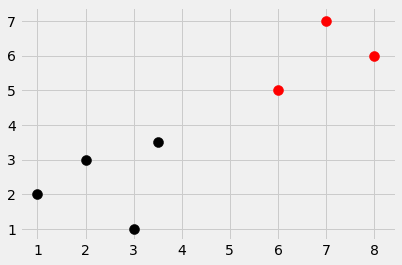

In [242]:
# check the result visually
[[ plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100, c=result)
plt.show()

In [202]:
####################################################################################
#let's test this algorithm with a real world dataset

In [203]:
df = pd.read_csv('datasets/breast-cancer-wisconsin.data')

In [180]:
df.head()

,id,clump_thickness,uniformity_cell_size,cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [181]:
df.shape

(699, 11)

In [182]:
# in the documentation mentioend that missing values are indicated by '?'
df.replace('?', -99999, inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [183]:
df.sample(10)

,clump_thickness,uniformity_cell_size,cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
571,7,6,10,5,3,10,9,10,2,4
525,3,1,1,2,2,1,1,1,1,2
530,7,4,4,3,4,10,6,9,1,4
537,5,1,2,1,2,1,3,1,1,2
312,8,6,4,10,10,1,3,5,1,4
510,1,1,1,1,2,1,1,1,1,2
353,2,7,10,10,7,10,4,9,4,4
524,3,1,1,1,2,1,2,1,1,2
473,4,1,1,1,2,1,1,1,1,2
407,1,1,1,1,2,1,2,1,1,2


In [184]:
# we just wanna make sure that all the values are number
full_df = df.astype(np.float64).values.tolist()

In [185]:
full_df[:5]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [186]:
random.shuffle(full_df)
len(full_df)

699

In [187]:
full_df[:5]

[[5.0, 10.0, 10.0, 9.0, 6.0, 10.0, 7.0, 10.0, 5.0, 4.0],
 [6.0, 1.0, 3.0, 1.0, 4.0, 5.0, 5.0, 10.0, 1.0, 4.0],
 [1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [10.0, 5.0, 5.0, 3.0, 6.0, 7.0, 7.0, 10.0, 1.0, 4.0]]

In [188]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set =  {2:[], 4:[]}
train_data = full_df[:-int(test_size*len(full_df))]
test_data = full_df[-int(test_size*len(full_df)):]

In [189]:
print(len(train_data))
print(len(test_data))

560
139


In [197]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [196]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neigbours(train_set, data, k=5)
        
        if group == vote:
            correct +=1
        total +=1

In [198]:
print('Accuracy:', correct/total)

Accuracy: 0.9640287769784173
